In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten


# To display the image
from IPython.display import Image

def take_photo(filename='photo.jpg', filename2 = "photoFacedetectiob.jpg",quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get the photo data
  data = eval_js('takePhoto({})'.format(quality))

   # decode the base64 encoded data
  img_data = b64decode(data.split(',')[1])

  # convert the image data to a NumPy array
  nparr = np.frombuffer(img_data, np.uint8)

  # decode the image data into an OpenCV image object
  img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

  # Appling Haarcascade
  grayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#converting color into gray scalei

  alg ="haarcascade_frontalface_default.xml" #accessed the model file
  haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")  #loading the model wth cv2

  face=haar_cascade.detectMultiScale(grayImg,1.3,4)#get coordinates of face

  if len(face) !=0:
    width,height = (100,100)
    for(x,y,w,h)in face:  #segregating x,y,w,h.
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
      face = img[y:y + h, x:x + w]
      face_resize = cv2.resize (face,(width, height) )

      # We have to pass this for detection
      # call a funcn here

    # Saving the function here
    cv2.imwrite(filename,face_resize)
    cv2.imwrite(filename2,img)
    print(faceRecognition(face_resize))

    # img is the image converted in opencv format
    return filename,filename2
  else:
    width,height = (100,100)
    image_resize = cv2.resize (grayImg,(width, height) )

    # Saving the function here
    cv2.imwrite(filename,image_resize)
    cv2.imwrite(filename2,img)
    print(faceRecognition(image_resize))

    # img is the image converted in opencv format
    return filename,filename2

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 18ms/step
100.0
Saved to photo.jpg


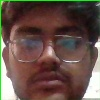

Saved to photoFacedetectiob.jpg


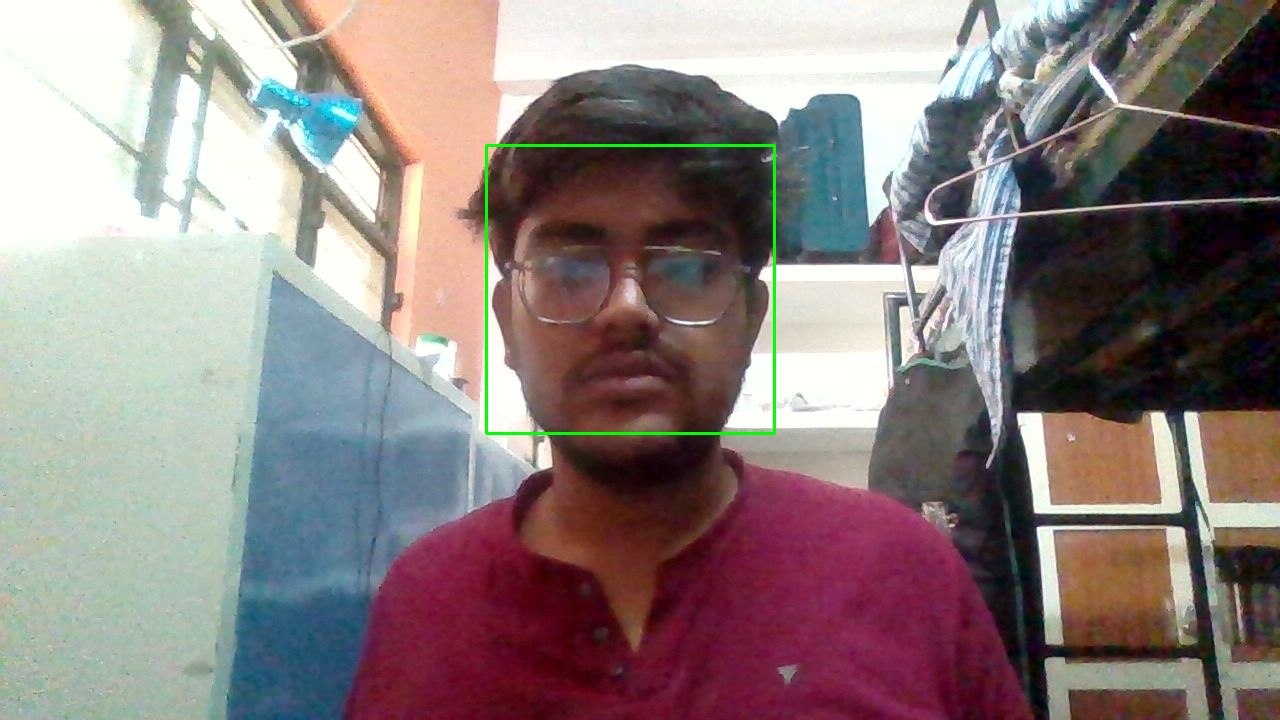

In [ ]:
from keras.utils.image_dataset import image_dataset_from_directory
from IPython.display import Image
try:
  filename,filename2 = take_photo()

  # Image 1 which is after cropping
  print('Saved to {}'.format(filename))
  display(Image(filename))

  # Image 2 which is without cropping
  print('Saved to {}'.format(filename2))
  display(Image(filename2))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Check the shape of the image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def take_photo2(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get the photo data
  data = eval_js('takePhoto({})'.format(quality))

   # decode the base64 encoded data
  img_data = b64decode(data.split(',')[1])

  # convert the image data to a NumPy array
  nparr = np.frombuffer(img_data, np.uint8)

  # decode the image data into an OpenCV image object
  img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

  # Appling Haarcascade
  grayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#converting color into gray scalei

  alg ="haarcascade_frontalface_default.xml" #accessed the model file
  haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")  #loading the model wth cv2

  face=haar_cascade.detectMultiScale(grayImg,1.3,4)#get coordinates of face
  width,height = (100,100)
  for(x,y,w,h)in face:  #segregating x,y,w,h.
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    face = img[y:y + h, x:x + w]
    face_resize = cv2.resize (face,(width, height) )

    # We have to pass this for detection

  cv2.imwrite(filename,face_resize)

  # img is the image converted in opencv format
  return (filename,face_resize)

<IPython.core.display.Javascript object>

Saved to photo.jpg


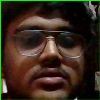

In [ ]:
try:
  # Also get the image in the return statement then it will work
  filename,image= take_photo2()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
tf.convert_to_tensor(image).shape

TensorShape([100, 100, 3])

### Defining embedding

In [ ]:
def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')

    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    print(c2)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)


    return Model(inputs=[inp], outputs=[d1], name='embedding')

embedding = make_embedding()

KerasTensor(type_spec=TensorSpec(shape=(None, 40, 40, 128), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")


### Defining the L1Dist class

In [ ]:
class L1Dist(Layer):

    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()

    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
def preprocess(file_path):


    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3(3 is beacuse of RGB seperate matrixes)
    # It do

    # We are resizing it as in the paper it's written it should be 105x 105
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img

In [ ]:
def imageResizingScaling(image):
  # Scale image to be between 0 and 1
  img = image / 255.0
  return img

In [ ]:
import tensorflow as tf
# Reloading the model
siamese_model = tf.keras.models.load_model('/content/drive/MyDrive/siamesemodelv2.h5', custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
def faceRecognition(image):
  yhat = []
  finalList = []
  # This is the image we will be getting from the camera
  image = tf.cast(image, tf.float32)
  tensorimage = tf.convert_to_tensor(image)
  prep_test_input = imageResizingScaling(tensorimage)
  exp_test_input = tf.expand_dims(prep_test_input,axis=0)

  # This is the image to which we will be comparing take atleast 50 images of the person to who you want to comapre to
  veripath = r'/content/drive/MyDrive/verification_images'

  test_val_iter = tf.data.Dataset.list_files(veripath+'/*.jpg').take(50).as_numpy_iterator()
  for i in test_val_iter:
    prep_test_val = preprocess(i)
    exp_test_val = tf.expand_dims(prep_test_input, axis=0)
    yhat.append(siamese_model.predict([exp_test_input, exp_test_val]))
    finalList = [1 if prediction > 0.5 else 0 for prediction in yhat ]
  return (sum(finalList)/50)*100